## Importing Libraries

In [20]:
!pip install --upgrade pip

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Metrics

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

## EDA

In [23]:
df = pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [24]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [25]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [26]:
species = np.unique(df.loc[:,'Species'])
species

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Outlier Detection and Removal

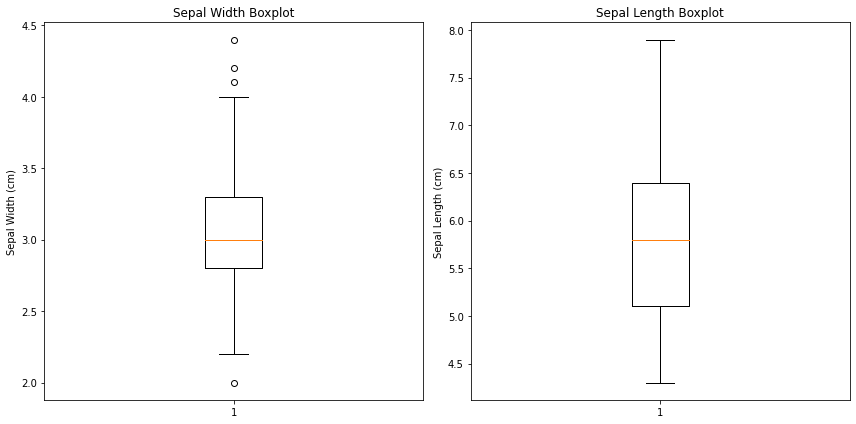

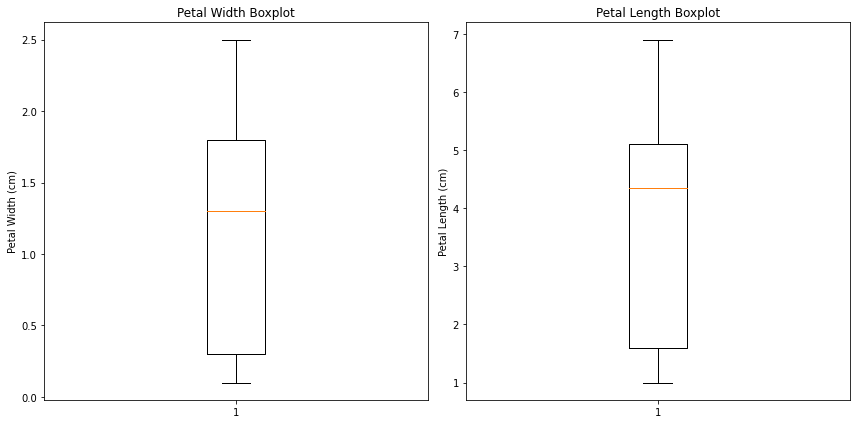

In [27]:
# Create a boxplot to visualize distribution of the data and detect any outliers

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot for SepalWidthCm
axes[0].boxplot(df['SepalWidthCm'])
axes[0].set_title('Sepal Width Boxplot')
axes[0].set_ylabel('Sepal Width (cm)')

# Boxplot for SepalLengthCm
axes[1].boxplot(df['SepalLengthCm'])
axes[1].set_title('Sepal Length Boxplot')
axes[1].set_ylabel('Sepal Length (cm)')

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Show the plot
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot for PetalWidthCm
axes[0].boxplot(df['PetalWidthCm'])
axes[0].set_title('Petal Width Boxplot')
axes[0].set_ylabel('Petal Width (cm)')

# Boxplot for PetalLengthCm
axes[1].boxplot(df['PetalLengthCm'])
axes[1].set_title('Petal Length Boxplot')
axes[1].set_ylabel('Petal Length (cm)')

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Show the plot
plt.show()

In [28]:
#Determine the number of rows in Sepal width containing outliers
# Compute the 25th percentile value in `tenure`
percentile25 = df['SepalWidthCm'].quantile(0.25)

# Compute the 75th percentile value in `SepalWidthCm`
percentile75 = df['SepalWidthCm'].quantile(0.75)

# Compute the interquartile range in `SepalWidthCm`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `SepalWidthCm`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `SepalWidthCm`
outliers = df[(df['SepalWidthCm'] > upper_limit) | (df['SepalWidthCm'] < lower_limit)]

# Count how many rows in the data contain outliers in `SepalWidthCm`
print("Number of rows in the data containing outliers in SepalWidthCm:", len(outliers))

Lower limit: 2.05
Upper limit: 4.05
Number of rows in the data containing outliers in SepalWidthCm: 4


## Finding Correlation among features

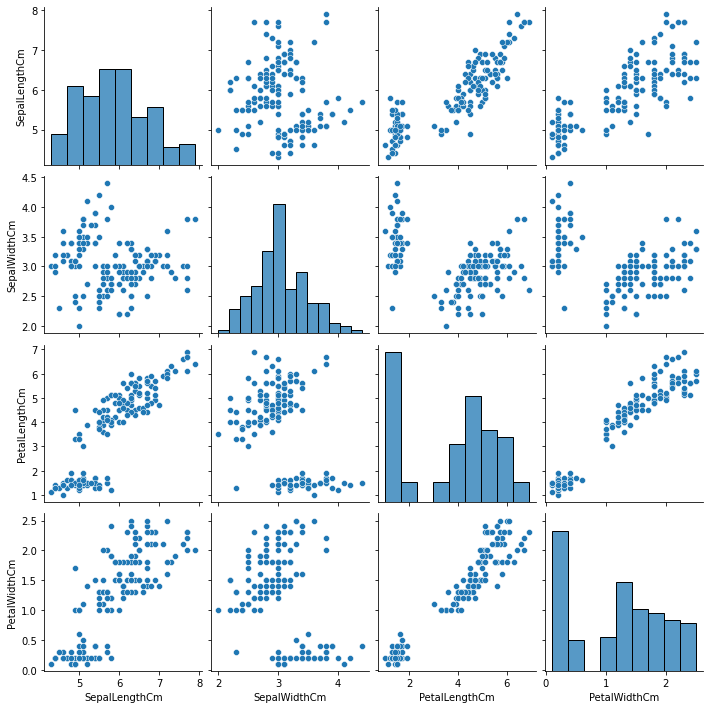

In [29]:
#Drop the ID column and create a pairplot to examine the relationship between variables
df.drop('Id',axis=1,inplace=True)
sns.pairplot(data = df)

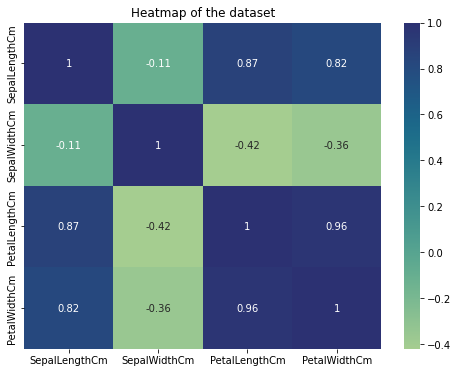

In [30]:
#Heatmap to examine variable correlations.

plt.figure(figsize=(8, 6))
sns.heatmap(df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

## Model

In [31]:
# Isolate the outcome variable
y = df['Species']

# Display first few rows of the outcome variable
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [32]:
# Drop species and declare the other variables as predictor variables (X)
X = df.drop(['Species', 'PetalLengthCm'], axis=1)

# Display the first few rows of the selected features 
X.head()

,SepalLengthCm,SepalWidthCm,PetalWidthCm
0,5.1,3.5,0.2
1,4.9,3.0,0.2
2,4.7,3.2,0.2
3,4.6,3.1,0.2
4,5.0,3.6,0.2


## Model

In [33]:
from sklearn.linear_model import LogisticRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the logistic regression model
model = LogisticRegression(max_iter=1000, multi_class='multinomial')
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

## Prediction

In [34]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

## Evaluation

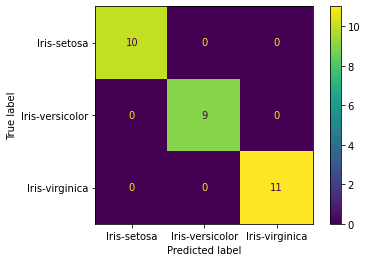

In [35]:
#Create a confusion matrix to visualize the results of the model.

# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=model.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

In [36]:
# Create classification report for logistic regression model
target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
print(classification_report(y_test, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

